# Consumer Reviews Summarization - Project Part 1 


[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)



## 1. Introduction
**Project Explanation** <br>
The aim of this project is to create a model that can summarize reviews by determining if they are positive, neutral, or negative, using ratings as a guide. This summarization model will enable customers to quickly scan through reviews when evaluating a product.<br>

**Data**< br>
The dataset was sourced from the Kaggle platform, specifically the [Consumer Review of Clothing Product](https://www.kaggle.com/datasets/jocelyndumlao/consumer-review-of-clothing-product)
 dataset. This dataset includes customer reviews from Amazon. It has all sorts of feedback from buyers about different products. Along with the customers' actual reviews, the dataset also has ratings, and types of products.<br>



## Data Exploration
Remove stop Words<br>
Most frequent words<br>
<br>
Do I have to split data to train and test?<br>
Can I delete/add col?<br>


In [47]:
# import all of the python modules/packages you'll need here
import pandas as pd
from collections import Counter
import pandas as pd
#!pip3 install nltk
import nltk
#nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

data_URL = 'https://raw.githubusercontent.com/Ariamestra/ConsumerReviews/main/Reviews.csv'
df = pd.read_csv(data_URL)
print(f"Shape: {df.shape}")
df.head()

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Shape: (49338, 9)


,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0


In [48]:
# Print the column names
print(f"Columns: {df.columns}")

Columns: Index(['Title', 'Review', 'Cons_rating', 'Cloth_class', 'Materials',
       'Construction', 'Color', 'Finishing', 'Durability'],
      dtype='object')


In [49]:
# Get summary of the DataFrame
print(f"Info: {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49338 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45370 non-null  object 
 1   Review        48507 non-null  object 
 2   Cons_rating   49124 non-null  float64
 3   Cloth_class   49322 non-null  object 
 4   Materials     5741 non-null   float64
 5   Construction  5743 non-null   float64
 6   Color         5742 non-null   float64
 7   Finishing     5737 non-null   float64
 8   Durability    5734 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB
Info: None


In [62]:
# Get the statistical summary of numerical columns
#print("Describe the ratings:")
#print(df['Cons_rating'].describe())
#print(df['Cons_rating'].value_counts())

print("Describe the ratings:")
print(df['Cons_rating'].describe())

print("\nCount of individual ratings:")
print(df['Cons_rating'].value_counts())


Describe the ratings:
count    49124.000000
mean         4.099463
std          1.283707
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Cons_rating, dtype: float64

Count of individual ratings:
Cons_rating
5.0    28359
4.0     8267
3.0     5350
1.0     3827
2.0     3321
Name: count, dtype: int64


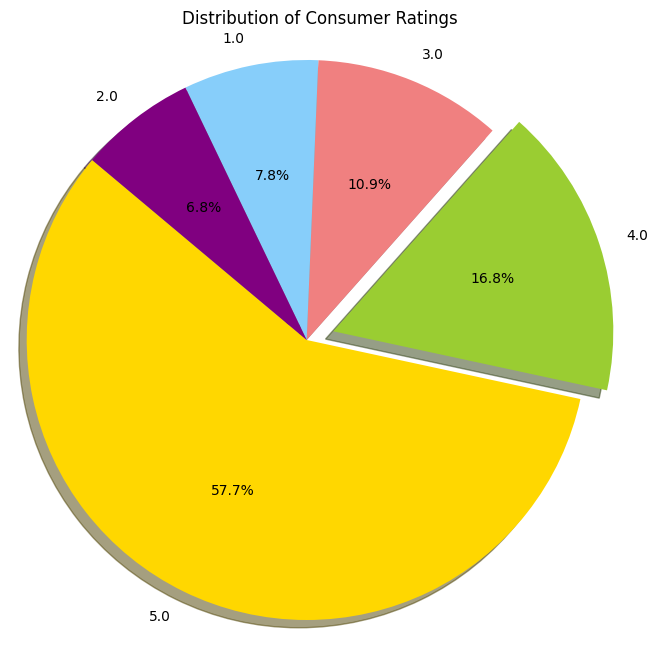

In [65]:
# Assuming 'df' is your DataFrame and 'Cons_rating' is the column with ratings
ratings_counts = df['Cons_rating'].value_counts()

# Now, let's create a pie chart for these rating counts
labels = ratings_counts.index
sizes = ratings_counts.values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple']  # colors for each section
explode = [0] * len(labels)  # Create an 'explode' list with all zeros
if 4 in labels:  # Check if '4' is one of the labels and 'explode' that slice if it is
    explode[labels.tolist().index(4)] = 0.1

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.title('Distribution of Consumer Ratings')
plt.show()


In [51]:
# Check for the number of missing values in each column
print("Find all of the nulls:")
print(df.isnull().sum())

Find all of the nulls:
Title            3968
Review            831
Cons_rating       214
Cloth_class        16
Materials       43597
Construction    43595
Color           43596
Finishing       43601
Durability      43604
dtype: int64


In [52]:
# Check for the number of missing values in each column
print(f"Missing values in each column: {df.duplicated().sum()}")
#print(df.duplicated().sum())

Missing values in each column: 1118


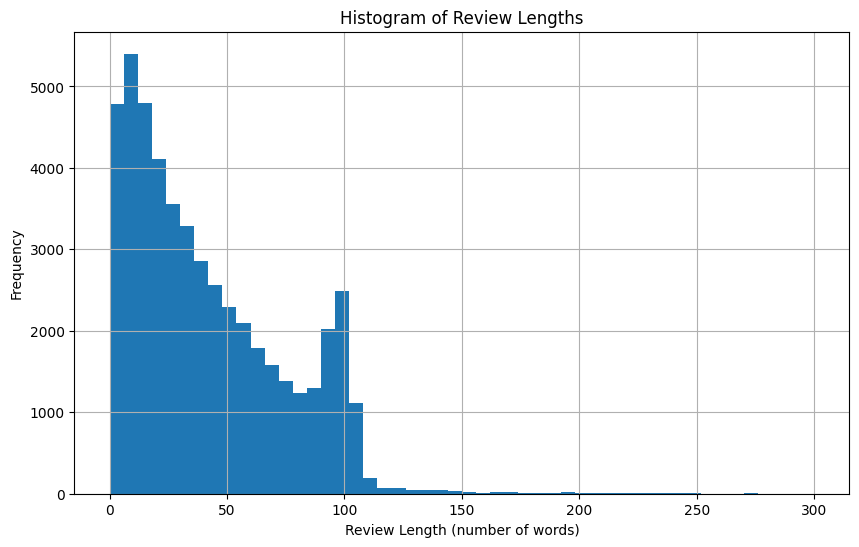

In [53]:
# Calculate the length of each review (in words)
df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))  # Ensure conversion to string in case of non-string types

# Plot the histogram of review lengths
plt.figure(figsize=(10, 6))
#df['review_length'].hist(bins=50)
df['review_length'].hist(bins=50, range=(0, 300))  # Set the range for the x-axis
plt.title('Histogram of Review Lengths')
plt.xlabel('Review Length (number of words)')
plt.ylabel('Frequency')
plt.show()

In [60]:
# Most common Words

# English Stop Words
stop_words = set(stopwords.words('english'))

# Combine all reviews into one large string
all_reviews = ' '.join(df['Review'].astype(str))

# Tokenize the text into words
words = all_reviews.split()
words = [word for word in words if word.lower() not in stop_words]

# Tokenize each review individually
#tokens = word_tokenize(all_reviews)
#tokenized_reviews = [word_tokenize(review) for review in df['Review'].astype(str)]

# Count the word frequencies
word_counts = Counter(words)

# Get the most common words
most_common_words = word_counts.most_common(20)  # Adjust the number as needed

#print(most_common_words)
print("Most common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


Most common Words:
fit: 10963
like: 10928
size: 10323
love: 9418
dress: 9327
wear: 8551
would: 7020
great: 6805
top: 5727
ordered: 5655
little: 5489
really: 5274
i'm: 5051
fabric: 4877
look: 4833
color: 4724
one: 4652
bought: 4561
it.: 4432
fits: 4393


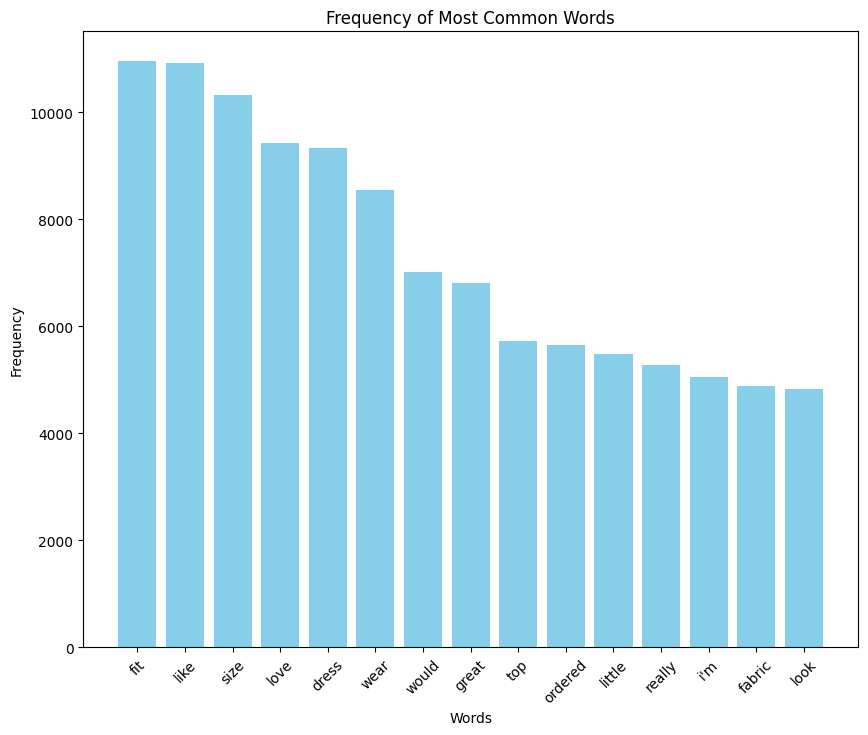

In [59]:
words, counts = zip(*most_common_words)

# Creating the histogram
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Most Common Words')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

# Drop rows with any missing value:
df = df.dropna()


## 3. Plan

My strategy for developing an effective model is exploration and evaluation of various machine learning and deep learning approaches. The initial step will involve an extensive study of different algorithms to grasp their underlying mechanics. I am considering experimenting with a variety of models, including the Random Forest, the probabilistic Naive Bayes, and the classic Logistic Regression, to assess their performance. Later, I plan to develop a deep learning model by implementing a Convolutional Neural Network (CNN). This type of model extracts patterns and features from data for more complex analysis. I am also interested in exploring embedding models which could enhance the model's understanding of subtle differences. My goal is to not only compare models but also to understand their strengths and limitations in terms of handling data, scalability, and computational efficiency.
